In [1]:
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import scanpy as sc

In [2]:
from util import standard_scanpy

In [3]:
hca_deep = sc.read('/Users/josh/src/noise2self-single-cell/data/hca/hca_marrow_deep.h5ad')
hca_deepdown = sc.pp.downsample_counts(hca_deep, 2000, replace = False, copy = True)

In [4]:
hca = sc.read('/Users/josh/src/noise2self-single-cell/data/hca/hca_marrow_2k.h5ad')
hca_sub = sc.pp.subsample(hca, n_obs = 10000, copy = True)

In [45]:
np.median(hca.obs['n_counts'])

2921.0

In [5]:
hca_combined = sc.AnnData.concatenate(hca_sub, hca_deepdown)

In [6]:
hca_combined = standard_scanpy(hca_combined)

In [18]:
sc.write('/Users/josh/src/noise2self-single-cell/data/hca/ hca_combined)

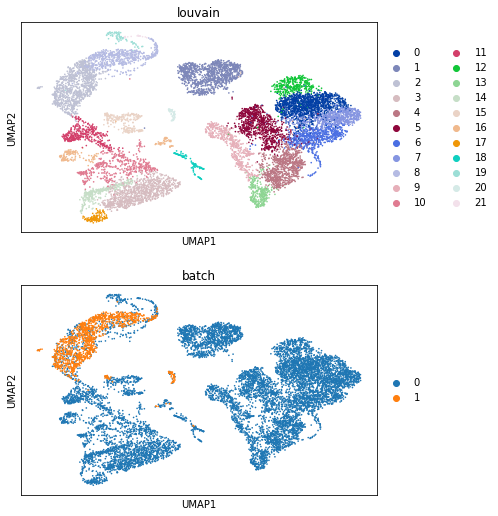

In [7]:
sc.pl.umap(hca_combined, color=['louvain', 'batch'], ncols = 1)

In [37]:
plt.subplots?

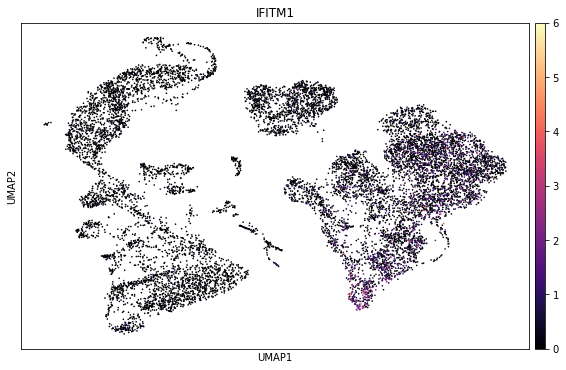

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
sc.pl.umap(hca_combined, color=['IFITM1'], ncols = 1,  ax = ax, cmap = 'magma')

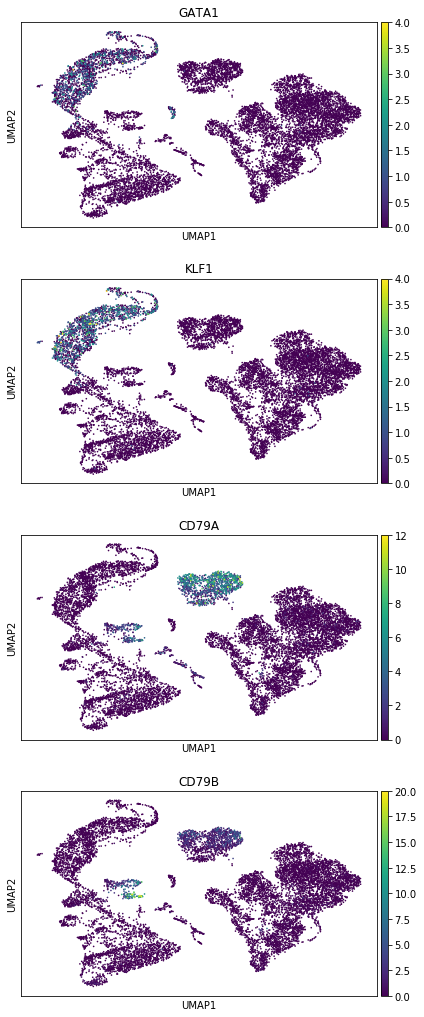

In [28]:
sc.pl.umap(hca_combined, color=['GATA1', 'KLF1', 'CD79A', 'CD79B'], ncols = 1)

Likely, these are ERP (erythroid progenitors), MEP (?), MKP.

Analysis of this dataset: https://www.exphem.org/article/S0301-472X(18)30805-1/fulltext#sec0002

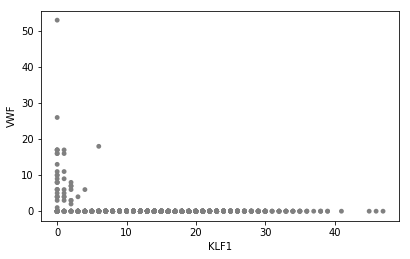

In [14]:
sc.pl.scatter(hca_deep, 'KLF1', 'VWF')

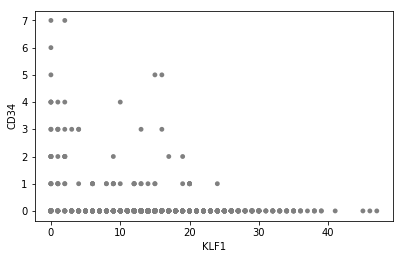

In [15]:
sc.pl.scatter(hca_deep, 'KLF1', 'CD34')

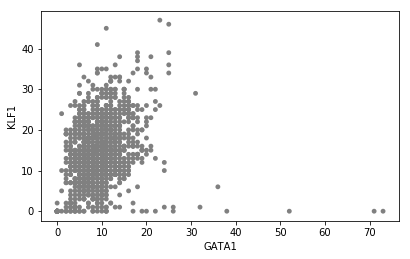

In [25]:
sc.pl.scatter(hca_deep, 'GATA1', 'KLF1')

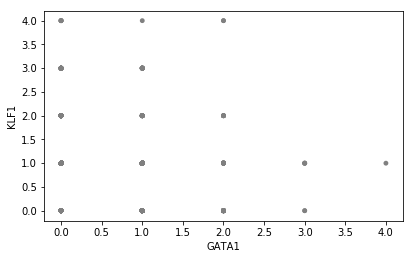

In [26]:
sc.pl.scatter(hca_deepdown, 'GATA1', 'KLF1')